In [1]:
from collections.abc import Collection
from collections import Counter #for counting occurence of strings in text
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud #wordcloud generator
from sklearn.preprocessing import OneHotEncoder
import tensorflow
import keras

Using TensorFlow backend.


# English Text

In [ ]:
hi='hello'
print(hi.upper())  #UPPERCASE
print(hi[-2])      #The second letter from the end #indexerr0r!!(
print(hi[0:3])     #for unknown reasons [0:3] means [0],[1],[2], excluding [3]

In [ ]:
text='This is a test text.'
for c in text:
    if c != ' ':
        print(c,end='') #override the default end='\n' to avoid new line
    else:
        print()

In [ ]:
print(text.split(' '))                 #split by the arg which is discarded in the result
print(text.replace('text','sentence')) #replace the first with the second

In [ ]:
punc=['.',',',':',';','"','\'']
for c in text:
    if c in punc:
        text=text.replace(c,' ')

for c in text.split(' '):
    if c != '':
        print(c)

In [ ]:
raw_article="""BEIJING - Xi Jinping, general secretary of the Communist Party of China (CPC) Central Committee and Chinese president, and his wife Peng Liyuan on Sunday met with Ri Su-yong, a senior official from the Democratic People's Republic of Korea (DPRK), and watched a performance by DPRK artists.

Ri, a member of the Political Bureau of the Workers' Party of Korea (WPK) Central Committee, vice-chairman of the WPK Central Committee and director of the party's International Department, is leading an art troupe to visit China.

This visit, as an important cultural exchange activity for implementing the consensus reached by the two sides, as well as a significant event in celebration of the 70th anniversary of the establishment of China-DPRK diplomatic relationship, will be a great success to cement friendship between the two peoples, Xi said.

Ri extended to Xi and his wife Peng Liyuan warm greetings and good wishes from Kim Jong-un, chairman of the WPK and chairman of the State Affairs Commission of the DPRK, and his wife Ri Sol-ju.

Xi asked Ri to convey the cordial greetings and good wishes to Kim and his wife.

Xi said he and Kim had reached important consensus on the development of China-DPRK party-to-party and state-to-state relations in the new era during their four meetings since 2018.

China stands ready to work with the DPRK to implement the important consensus reached by the two sides, so as to better benefit the two peoples and contribute to world peace, stability, development and prosperity, Xi said.

Art and cultural exchange is an important, unique and traditional component in bilateral ties, Xi said, calling for joint efforts in implementing the consensus on strengthening art and cultural exchanges and cooperation, so as to consolidate the foundation of good will of the people, carry forward traditional friendship, and promote the development of respective socialist cultures.

Ri expressed gratitude to Xi and his wife for watching the performance.

This visit and art performance represented Kim's deep feelings to Xi and the DPRK people's profound friendship with the Chinese people, Ri said.

The DPRK side will earnestly implement the important consensus reached by Kim and Xi, strengthen friendly cooperation and contribute to writing a new chapter in DPRK-China friendship, Ri added.

The performance featured famous and popular songs in both the DPRK and China.

The visit of the DPRK art troupe is at the invitation of the International Department of the CPC Central Committee.'"""

In [ ]:
legal_char='qwertyuiopasdfghjklzxcvbnm1234567890-_\''
article=raw_article.lower()
word_list=[]
word=''
for c in article:
    if c in legal_char:
        word=word+c
    elif word!='':
        word_list.append(word)
        word=''

if word!='':
    word_list.append(word)
    word=''

print(word_list)

In [ ]:
occur_the,occur_a=0,0
for word in word_list:
    if word =="the":
        occur_the+=1
    elif word =="a":
        occur_a+=1

freq_the=occur_the/len(word_list)
freq_a=occur_a/len(word_list)
print('the:',freq_the,' a:',freq_a)

In [ ]:
letters='abcdefghijklmnopqrstuvwxyz'
length=len(article)
counter=0
occur=[]
i=0
for c in letters:
    i+=1
    for d in article:
        if c==d:
            counter+=1
    occur.append(counter)
    plt.plot([i,i],[0,counter],'-',linewidth=10)
    counter=0

plt.show()

In [ ]:
word_set=set(word_list) #turns the list into a set
dic=Counter(word_list)
sorted_list=dic.most_common()
print(sorted_list)

In [ ]:
def print_first_n(data,n):
    for i in range(n):
        print(data[i][0],':',data[i][1])
        
print_first_n(sorted_list,3)

In [ ]:
token=[]
occurence=[]
for i in range(20):
    token.append(sorted_list[i][0])
    occurence.append(sorted_list[i][1])
plt.bar(token,occurence)
plt.xticks(size=20,rotation=30)
plt.show()

In [ ]:
wcmodel=WordCloud(background_color="black",font_path='C:\Windows\Fonts\Georgia\georgiab.ttf',height=900,width=900).generate(raw_article)
plt.imshow(wcmodel)
plt.axis('off')   #no axis
plt.show()

# Chinese

In [2]:
#read file
poetry=open('D:/poetry.txt','r',encoding='utf-8')
poem=poetry.readlines()  #read all lines as a list; you can read 1 line with readline()
poetry.close()

In [3]:
#preprocession

#dealing with puctuations
punc=[',', '.' ,'_', ')', '(', '。', '，', ',', '》', '《', '\n','“','”']
for i in range(len(poem)):
    for sym in punc:
        poem[i]=poem[i].replace(sym,' ')

#spliting title and body
titles=[]
content=[]
for i in range(len(poem)):
    temp=poem[i].split(':')
    if len(temp)<2:
        titles.append('UNTITLED')
        content.append(temp[0])
    else:
        titles.append(temp[0])
        content.append(temp[1])

#del punctuation
for i in range(len(content)):
    content[i]=content[i].replace(' ', '')

#put all characters into a list
char=[]
for i in range(len(content)):
    for c in range(len(content[i])):
        char.append(content[i][c])
print(len(char))

2586053


7549


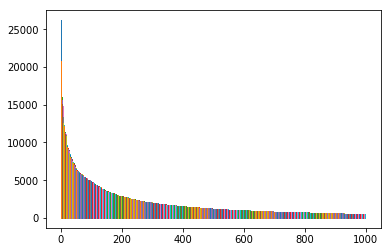

In [4]:
char_count=Counter(char)
sorted_char=char_count.most_common()
print(len(sorted_char))
most_used=sorted_char[0:1000]
for i in range(1000):
    plt.plot([i,i],[0,most_used[i][1]],'-',linewidth=1)
plt.show()

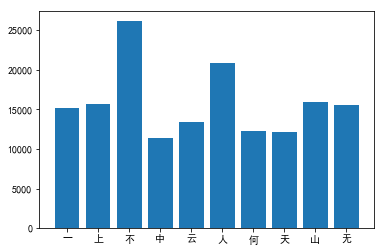

In [11]:
plt.rcParams['font.sans-serif']=['SimHei'] #chinese font
plt.rcParams['axes.unicode_minus']=False
char_freq=[]
char_sorted=[]
for i in range(20):
    char_sorted.append(sorted_char[i][0])
    char_freq.append(sorted_char[i][1])
plt.bar(char_sorted,char_freq)
plt.show()

In [ ]:
chinese_text=''
for i in char:
    chinese_text+=i
wcmodel2=WordCloud(background_color="black",font_path='C:\Windows\Fonts\微软雅黑\msyh.ttf').generate(chinese_text)
plt.imshow(wcmodel2)
plt.axis('off') 
plt.show()

In [ ]:
frqc={}
for i in sorted_char:
    frqc[i[0]]=i[1]
wcmodel3=WordCloud(background_color="black",font_path='C:\Windows\Fonts\微软雅黑\msyh.ttf',height=1080,width=1920).generate_from_frequencies(frqc)
plt.figure(figsize=(100,100))
plt.imshow(wcmodel3) 
plt.axis('off') 
plt.show()

In [ ]:
#from scipy.misc import imread 
#img=imread('<filepath>')
#model=WordCloud(mask=img).generate(text)

# word embedding: turn words into vectors

## word2vec
## one-hot
## Glove

In [12]:
def one_hot_encoder(data,n=2000):
    vector_dict={}
    for i in range(n-1):
        vec=np.zeros(shape=[n])
        vec[i]=1.0
        vector_dict[data[i][0]]=vec
    for i in range(n-1,len(data)):
        vec=np.zeros(shape=[n])
        vec[n-1]=1.0
        vector_dict[data[i][0]]=vec
    return vector_dict

In [14]:
n=2000
vector_dict=one_hot_encoder(sorted_char)

prev=[]
latt=[]
for poem in content:
    length=len(poem)
    for i in range(length-1):
        if (poem[i] in vector_dict.keys()) and (poem[i+1] in vector_dict.keys()):
            prev.append(poem[i])
            latt.append(vector_dict[poem[i+1]])
            


In [ ]:
def predict(char_vect,vec_size=2000,it=20):
    if char not in vector_dict:
        print('char not in dict')
        return
    else:
        freq_vec=np.zeros(shape=[vec_size])
        vec_in=vector_dict[char]
        for i in range(len(prev)):
            if (prev[i]== vec_in).all():  #.all() returns true iff all dimensions are true, .any() is OR
                freq_vec=freq_vec+np.array(latt[i])
        max_index=[0]
        max_freq=0
        for i in range(len(freq_vec)):
            if freq_vec[i]>max_freq:
                max_freq=freq_vec[i]
                max_index=[i]
            elif freq_vec[i]==max_freq:
                max_index.append(i)
        idx=max_index[0]
        if it==0:
            return max_index
        predict(,vec_size,it-1)
        
predict('不',vec_size=2000)

pred_dict={}

for w in vector_dict.keys():
    for i in range(len(prev)):
        arr=np.zeros(shape=[2000])
        if (prev[i]==vector_dict[w]).all():
            arr=arr+latt[i]
    index=np.argmax(arr)
    pred_dict[w]=sorted_char[index][0]

In [81]:
pred_dict={}
for k in range(5000):
    w=sorted_char[k][0]
    arr=np.zeros(shape=[2000])
    for i in range(len(prev)):
        if prev[i]==w:
            arr=arr+latt[i]
    index=np.argsort(arr[:-1])[-5:]
    pred_dict[w] = []
    for i in range(5):
        pred_dict[w].append(sorted_char[ index[i]][0])

In [116]:
pred_dict['不']

['如', '得', '可', '见', '知']

In [ ]:
def pred(char,dic,predict_dic,it=20):
    if char not in dic.keys():
        print('char not in dic')
        return
    if it>0:
        rand=np.random.randint(0,4)
        temp_char=dic[predict_dic[char]]
        print(temp_char,end='')
        return pred(temp_char,dic,predict_dic,it=it-1)
    
    return


In [111]:
def next_char(char):
    rand=np.random.randint(0,4)
    temp=pred_dict[char]
    result=temp[rand]
    return result

In [119]:
def write(begin='人',n=4,l=5):
    output=''
    last_char=begin
    for z in range(n):
        for k in range(l):
            output+=(last_char)
            last_char=next_char(last_char)
        if z %2==0:
            output+=('，')
        else:
            output+=('。')
    print(output)
    return

In [171]:
write(begin='天')

天上有余霞，明朝天涯望。月夜月中无，事何时来时。


In [7]:
word2idx={}
for i in range(1999):
    word2idx[sorted_char[i][0]]=i+1
word2idx['UNK']=2000

idx2word={}
for i in range(1999):
    idx2word[1+i]=sorted_char[i][0]
idx2word[2000]='UNK'

In [8]:
feature=[]
label=[]
for poem in content:
    for i in range(len(poem)-4):
        ftr=[]
        for j in range(5):
            if poem[i+j] in word2idx.keys():
                if j==2:
                    label.append(word2idx[poem[i+j]])
                else:
                    ftr.append(word2idx[poem[i+j]])
            elif j==2:
                label.append(2000)
            else:
                ftr.append(2000)
        feature.append(ftr)

In [11]:
label[0]

342